In [5]:
import numpy as np
import pandas as pd
from os import path, getcwd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


Load data berita tentang penerbangan India ke Indonesia dari detik.com

In [7]:
data=pd.read_csv("Penerbangan India.txt", sep='\t')

In [8]:
data

,Berita
0,Indonesia dikejutkan dengan kabar eksodus WN ...
1,"Beberapa waktu lalu, Indonesia dihebohkan deng..."
2,"Dari ratusan WN India itu, sebanyak 12 orang d..."
3,Sebanyak 49 penumpang dalam satu penerbangan V...
4,Otoritas berwenang di Hong Kong tidak menyebut...
...,...
84,Pihak Kedubes India di Jakarta pun ikut memfas...
85,Hanya terkait tingginya lonjakan penderita COV...
86,Ketentuannya akan dilanjutkan dengan surat eda...
87,"Selain untuk WNA, aturan baru soal perjalanan ..."


Mengambil kolom Berita

In [9]:
text = " ".join(text for text in data.Berita)

WordCloud basic

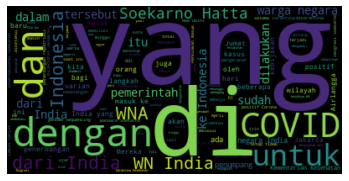

In [10]:
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

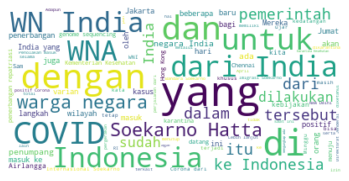

In [11]:
#Mengubah batas banyak kata dan background wordcloud
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

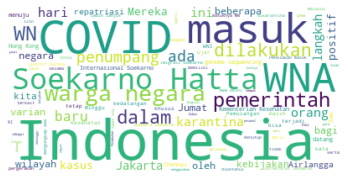

In [16]:
#Membuat stopwords

stopwords = set(STOPWORDS)
stopwords.update(["yang", "dan", "di", "dengan", "India", "untuk", "dari", "tersebut", "sudah","ke","itu","penerbangan","akan","juga"])

# membuat wordcloud
wordcloud = WordCloud(stopwords=stopwords, max_words=100,background_color="white").generate(text)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Wordcloud dengan logo detik.com

In [17]:
mask = np.array(Image.open("detiklogo.png"))
mask
#Mengganti nilai 0 pada array mask dengan 255
isi = [0,1,2,3]
for i in range (len(mask)):
    for j in range (len(mask)):
        for k in range (len(isi)):
            if mask[i][j][k] == 0:
                mask[i][j][k] =255

In [18]:
mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

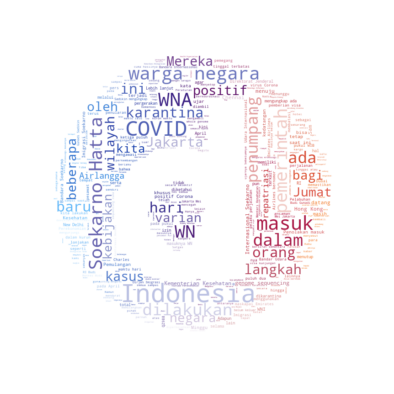

In [21]:
# Membuat wordcloud

wordcloud = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text)

# membuat warna dari gambar
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.show()

Berdasarkan wordcloud di atas maka kata yang paling sering banyak muncul adalah COVID, Soekarno- Hatta, WNA, Indonesia.